In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Univariate Analysis**

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


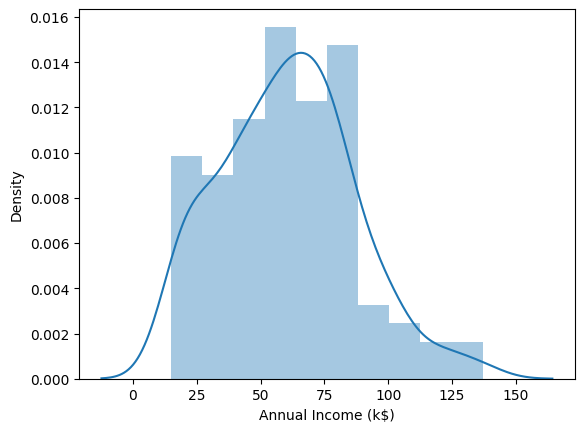

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

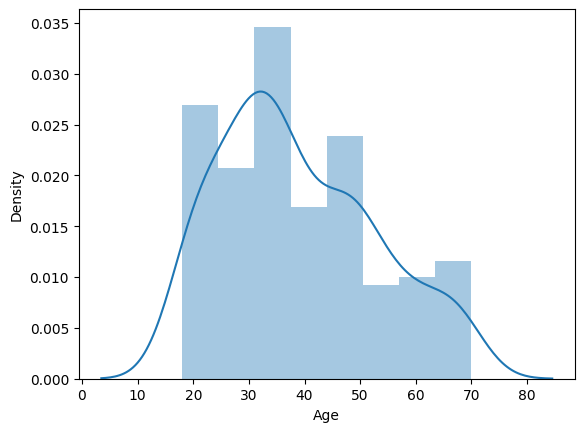

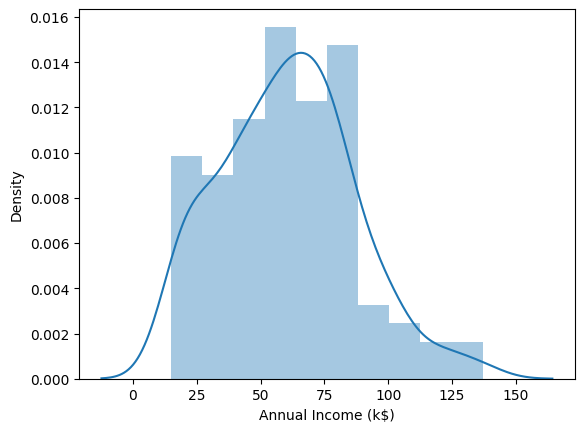

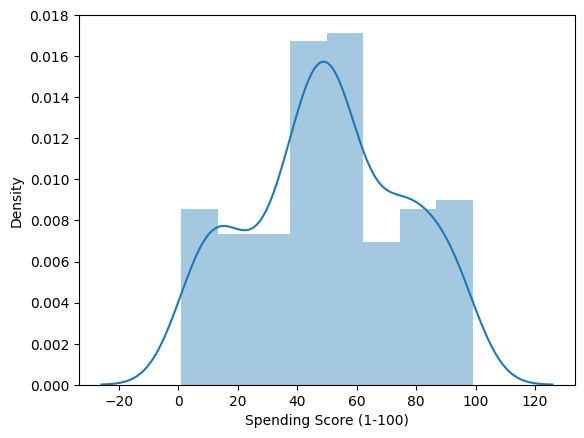

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

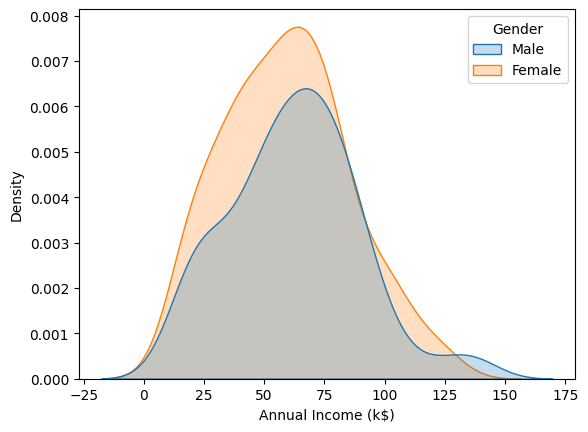

In [12]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True)


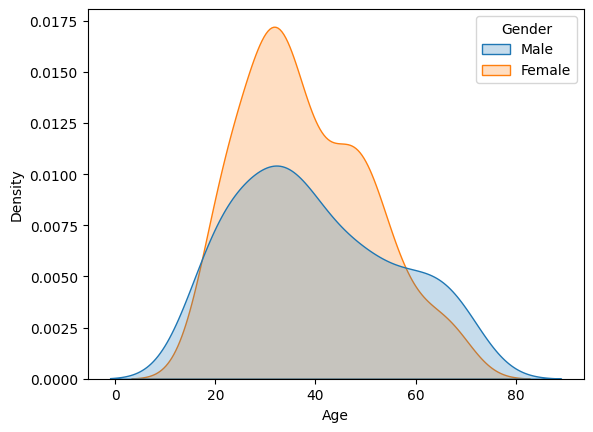

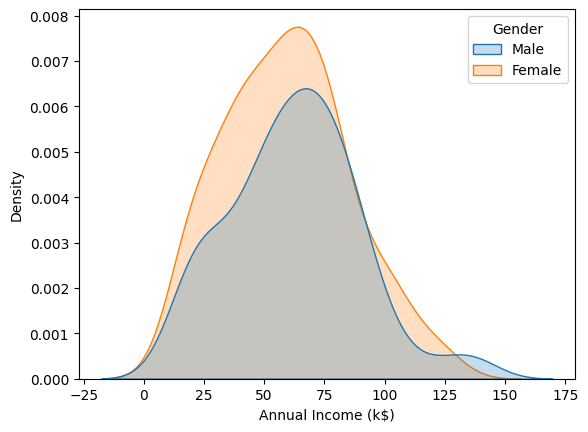

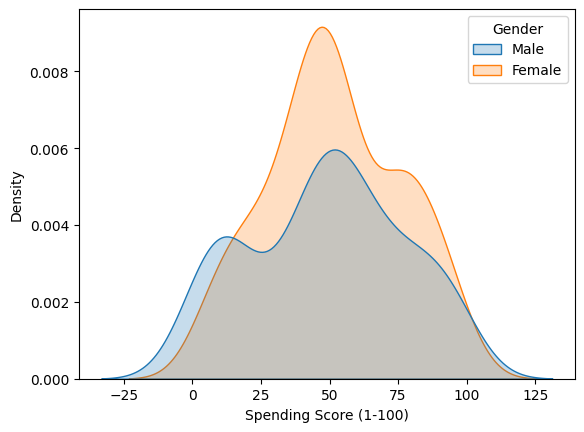

In [14]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x=i, hue='Gender', shade=True)


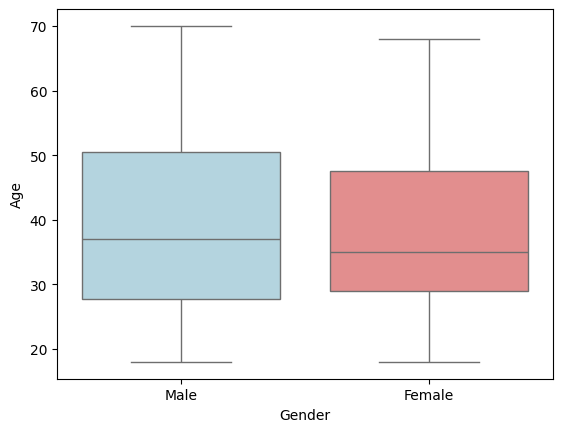

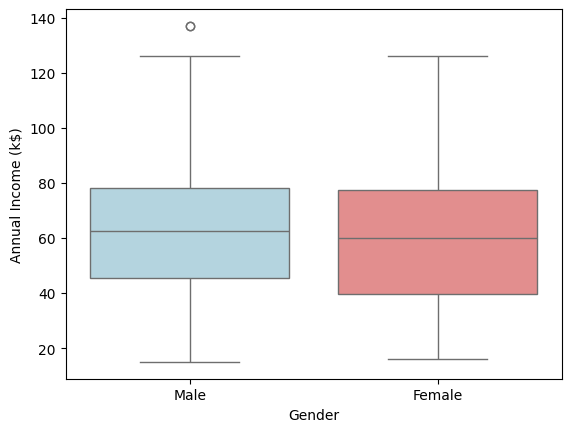

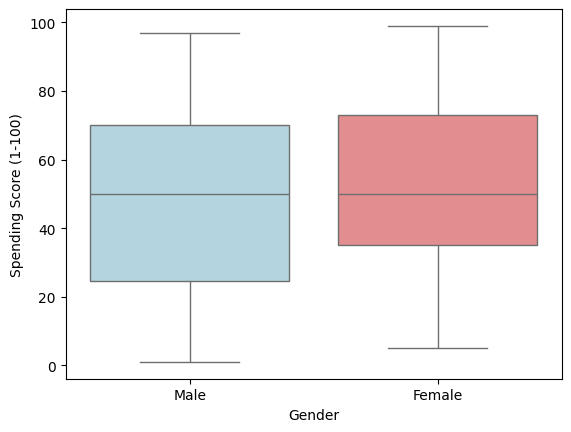

In [17]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i], palette=['lightblue', 'lightcoral'])


In [18]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


### **Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

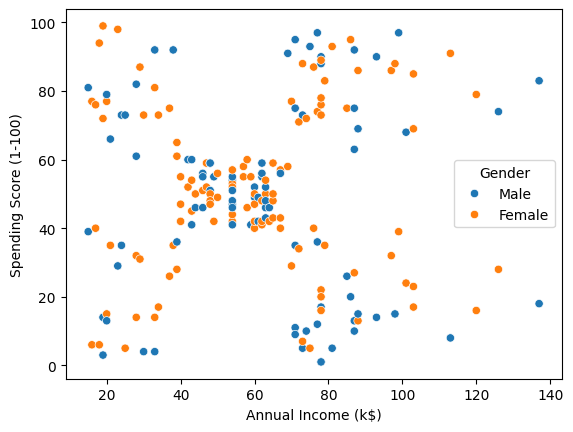

In [21]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

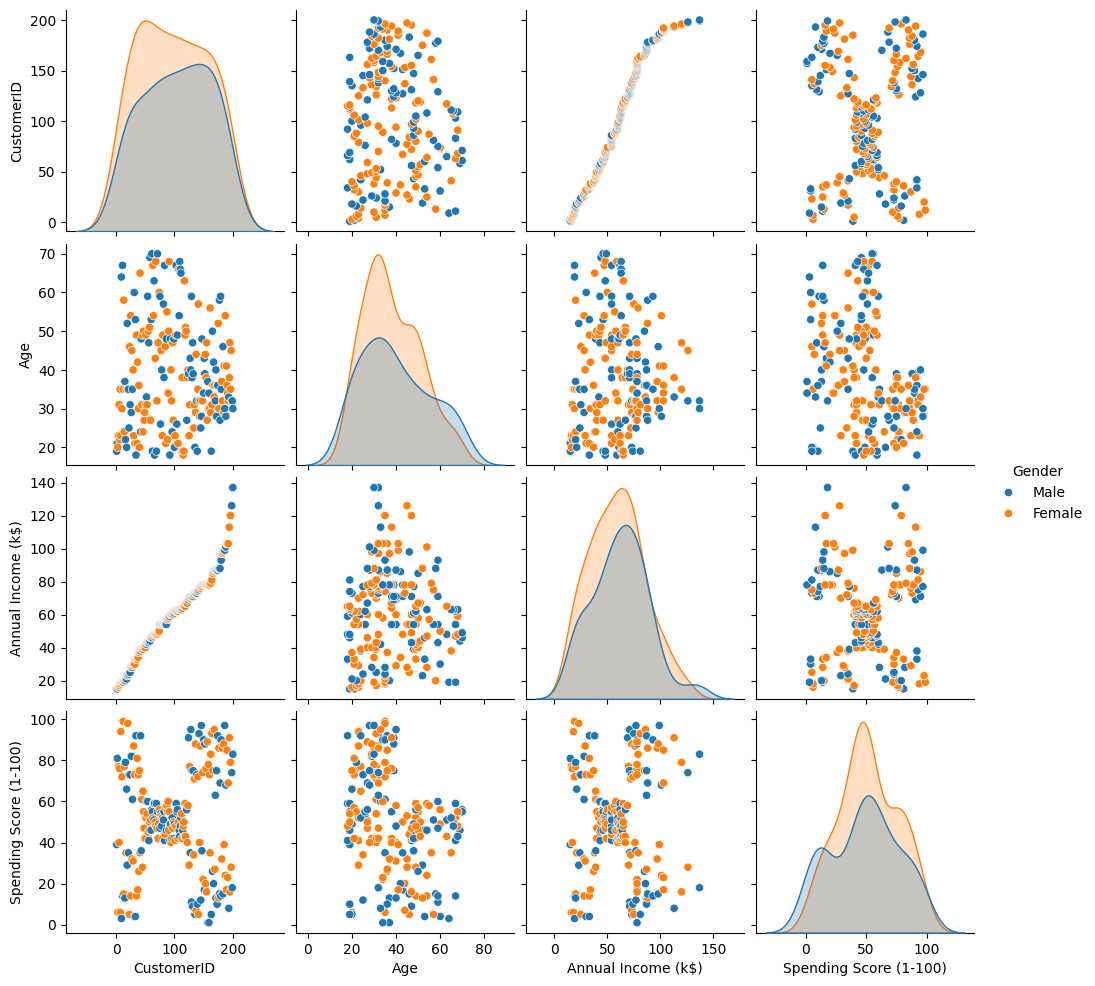

In [22]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [26]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


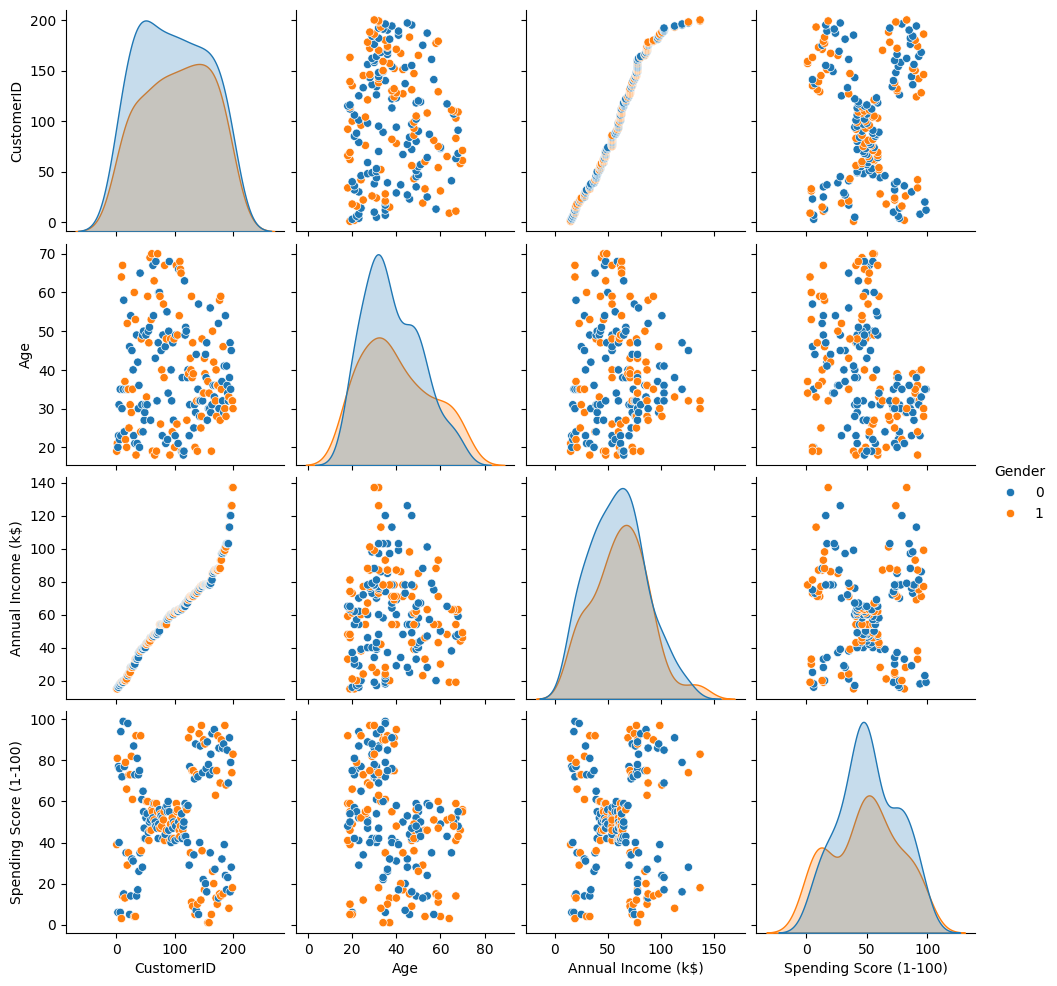

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
sns.pairplot(df, hue='Gender')


In [46]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

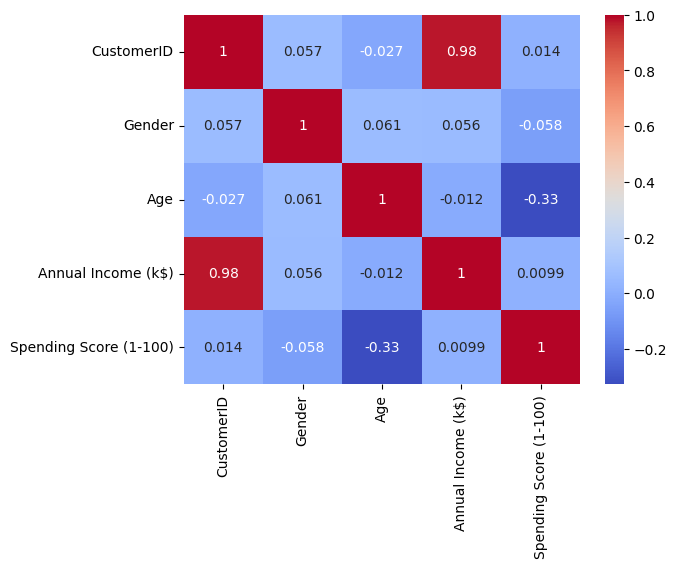

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### **Clustering - Univariate, Bivariate, Multivariate**

In [48]:
clustering1 = KMeans(n_clusters=3)

In [49]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [50]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [51]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2


In [52]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,86
2,58
1,56


In [53]:
clustering1.inertia_

25640.457784396807

In [54]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [55]:
intertia_scores

[137277.2800000002,
 49761.737012987025,
 24361.259213759215,
 14647.235170393054,
 8481.49619047619,
 5430.245925925928,
 3989.608946608945,
 3021.5955988456008,
 2426.67332112332,
 2013.230710466005]

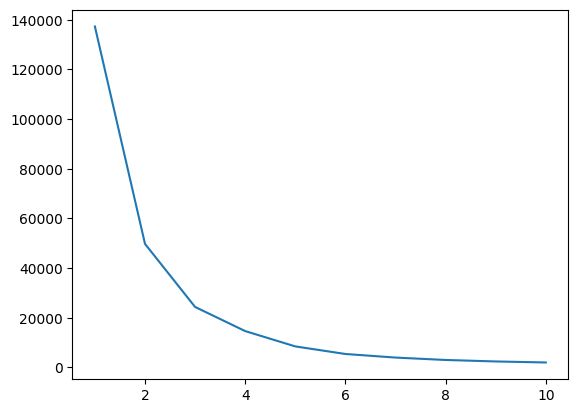

In [56]:
plt.plot(range(1,11),intertia_scores)

In [57]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [61]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


### **Bivariate Clustering**

In [62]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,0
1,2,1,21,15,81,2,1
2,3,0,20,16,6,2,0
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,0


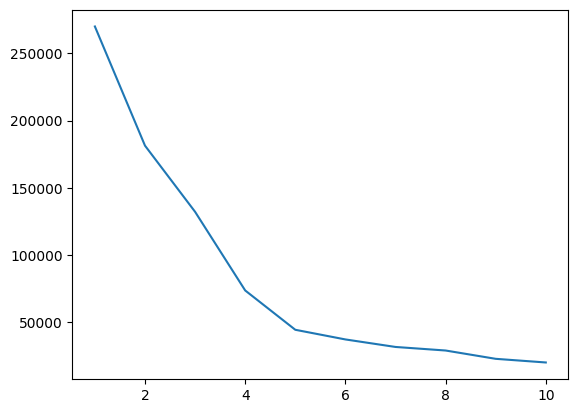

In [63]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [64]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

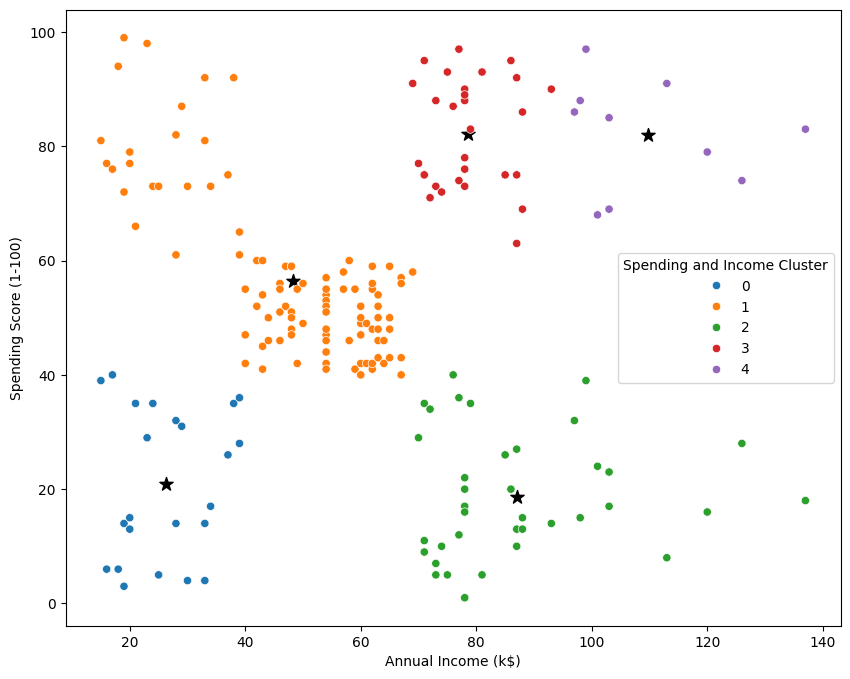

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [66]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.590000,0.410000
2,0.473684,0.526316
3,0.517241,0.482759
4,0.600000,0.400000


In [69]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,39.200000,48.260000,56.480000
2,40.394737,87.000000,18.631579
3,32.862069,78.551724,82.172414
4,32.200000,109.700000,82.000000


### **Mulivariate clustering**

In [72]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,0
1,2,1,21,15,81,2,1
2,3,0,20,16,6,2,0
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,0


In [73]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,0
1,2,1,21,15,81,2,1
2,3,0,20,16,6,2,0
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,0


In [74]:
dff.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [78]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [79]:
dff.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [80]:
dff = scale.fit_transform(dff)

In [81]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


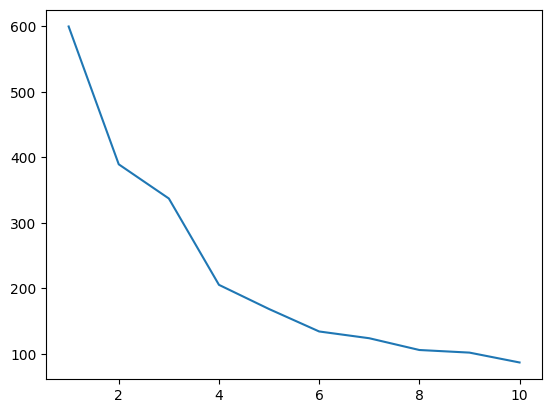

In [82]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [83]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,2,0
1,2,1,21,15,81,2,1
2,3,0,20,16,6,2,0
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,4
196,197,0,45,126,28,1,2
197,198,1,32,126,74,1,4
198,199,1,32,137,18,1,2
